# Report on Prediction of Fraud (Supervised Learning)

## Short Abstract
This report focuses on the prediction of fraud using supervised learning techniques. It delves into the analysis of various variables to determine their influence on the target variable, which indicates fraudulent transactions.

## Statement of the Problem/Goal of the Analysis and Description of the Dataset(s)
The goal of this analysis is to identify the factors influencing fraudulent transactions. The dataset includes variables such as ID, date, target (indicating fraud), income, age, binary rule variables, and others. There are gaps and imbalances in the classes of the target variable, requiring preprocessing steps like filling gaps in non-binary characteristics.

## List of Findings/Keypoints
1. There are gaps in non-binary characteristics, addressed by filling NA values using row sums of specific columns.
2. Initial hypotheses about transactional fraud include frequency of fraudulent transactions, discrepancies in card and passport data, and repeated transactions with similar yields. Statistically supported hypotheses involve identifying salary accounts based on age, amount, and weekend indicators, and detecting first transfers from external cards.
3. Models such as Logistic Regression and Random Forest achieved respective accuracies of 39.94% and 41.94%.

## Theoretical Background of Used Methods
The methods employed in this analysis include logistic regression and random forest, which are commonly used for classification tasks in supervised learning. Logistic regression models the probability of a binary outcome, while random forest constructs an ensemble of decision trees to make predictions.

## Conclusions
Through the analysis, it's evident that variables like income, age, and specific binary rule indicators play a role in predicting fraudulent transactions. Preprocessing steps like filling gaps and imputation are essential for handling missing data. Additionally, hypotheses generated from statistical analysis provide insights into potential patterns of fraudulent behavior. The models developed exhibit moderate predictive performance, suggesting further exploration and refinement may be necessary.


# Prediction of fraud (supervised learning)

It is necessary to determine the influence of variables on target

Description of variables:

id - entity identifier \
date - date \
target - target variable \
req_amt - income \
age - age \
rule_2_21 - rule 2_806 binary variables \
rule_combi_1, rule_combi_2 binary variables in the form of combinations
flags of the previous paragraph \
rules_count - number of triggered flags \
score - speed

There are gaps and pronounced imbalances in the classes of the target variable in the data.

In [65]:
library("dplyr")
library("magrittr")
library(ggplot2)
options(warn=-1)

In [2]:
df <- read.csv('Task DF Case 2.csv', sep=';')

In [3]:
head(df, 5)

,id,date,target,req_amt,age,rule_2_21,rule_2_22,rule_2_23,rule_2_24,rule_2_25,⋯,rule_2_806,rule_combi_1,rule_combi_2,rules_count,score_bank_16,score_bank_50,score_nn_16,score_nn_50,score_bank_nn_16,score_bank_nn_50
,<int>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,238687671,20.06.2019,0,689385,40,0,0,0,0,1,⋯,0,1,0,2,148,161,0.1511,0.1243,224,202
2,248689049,02.08.2019,0,450000,57,0,0,0,0,0,⋯,0,0,0,0,128,128,-1.0000,-1.0000,313,313
3,276054054,22.11.2019,0,500000,32,1,1,0,0,1,⋯,1,0,0,5,289,294,0.1255,0.1278,264,227
4,313767939,24.02.2020,0,730000,31,0,0,0,0,0,⋯,1,0,0,1,NA,NA,NA,NA,NA,NA
5,342351235,10.06.2020,0,1490000,68,0,0,0,0,0,⋯,1,0,0,0,NA,NA,NA,NA,NA,NA


In [4]:
dim(df)

[1] 100000     28

In [5]:
summary(df)

       id                date               target           req_amt       
 Min.   :137175209   Length:100000      Min.   :0.00000   Min.   :  50000  
 1st Qu.:220747368   Class :character   1st Qu.:0.00000   1st Qu.: 400000  
 Median :263040542   Mode  :character   Median :0.00000   Median : 614900  
 Mean   :280116429                      Mean   :0.00129   Mean   : 681123  
 3rd Qu.:337582833                      3rd Qu.:0.00000   3rd Qu.: 900000  
 Max.   :517283235                      Max.   :1.00000   Max.   :3000000  
                                                                           
      age          rule_2_21       rule_2_22       rule_2_23      rule_2_24   
 Min.   : 0.00   Min.   :0.000   Min.   :0.000   Min.   :0      Min.   :0     
 1st Qu.:34.00   1st Qu.:0.000   1st Qu.:0.000   1st Qu.:0      1st Qu.:0     
 Median :41.00   Median :0.000   Median :0.000   Median :0      Median :0     
 Mean   :42.08   Mean   :0.158   Mean   :0.146   Mean   :0      Mean   :0   

In [6]:
library(ggplot2)

# Convert target column to factor if it's not already
df$target <- as.factor(df$target)

# Calculate counts by target
counts <- as.data.frame(table(df$target))
max_count <- max(counts$Freq)

# Scale counts to 1
counts$Freq_scaled <- counts$Freq / max_count

In [7]:
counts

Var1,Freq,Freq_scaled
<fct>,<int>,<dbl>
0,99871,1.000000000
1,129,0.001291666


In [8]:
# Uninformative features
print(table(df$rule_2_23, df$rule_2_24, df$rule_2_26))
# Drop rules with zeroes
df <- subset(df, select = -c(rule_2_23, rule_2_24, rule_2_26))

, ,  = 0

   
        0
  0 94223



corrplot 0.92 loaded



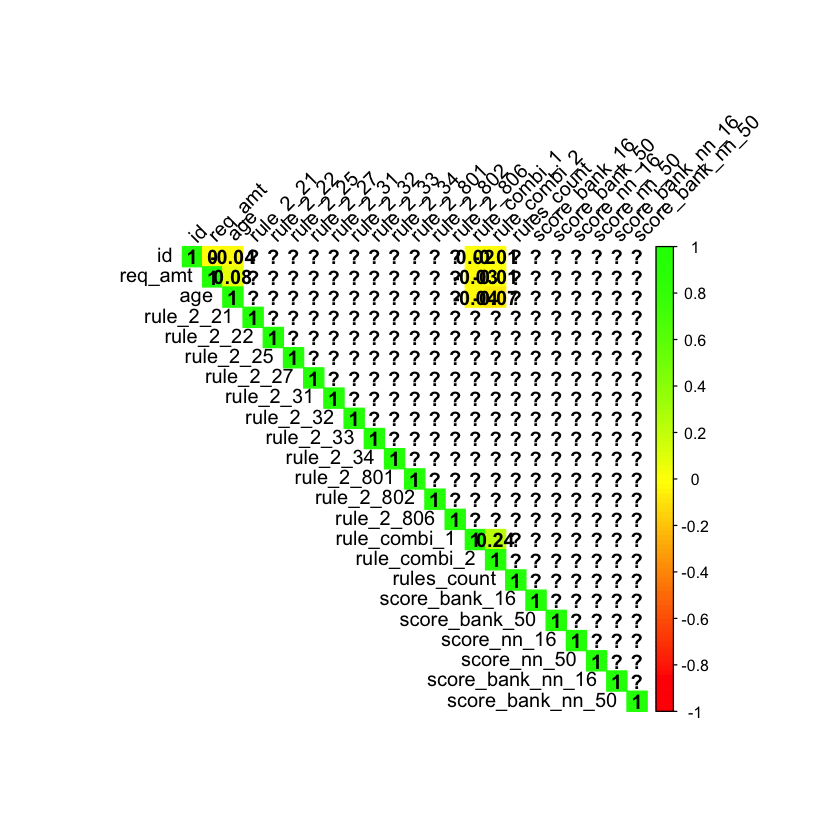

In [9]:
library(ggplot2)
library(corrplot)

# Select only numeric columns
numeric_df <- df[sapply(df, is.numeric)]

# Calculate Pearson correlation matrix
correlation_matrix <- cor(numeric_df)

# Plot heatmap
corrplot(correlation_matrix, method = "color", col = colorRampPalette(c("red", "yellow", "green"))(100),
         type = "upper", order = "original", addCoef.col = "black", tl.col = "black", tl.srt = 45)

Multicollinear features don't exist

In [10]:
# Print percentage of missing values
print("Percentage of missing values")
df$count_nulls <- 0
missing_percentage <- colSums(is.na(df)) / nrow(df) * 100
print(missing_percentage)

[1] "Percentage of missing values"
              id             date           target          req_amt 
           0.000            0.000            0.000            0.000 
             age        rule_2_21        rule_2_22        rule_2_25 
           0.000            5.777            5.777            5.777 
       rule_2_27        rule_2_31        rule_2_32        rule_2_33 
           5.777            5.777            5.777            5.777 
       rule_2_34       rule_2_801       rule_2_802       rule_2_806 
           5.777            5.777            5.777            5.777 
    rule_combi_1     rule_combi_2      rules_count    score_bank_16 
           0.000            0.000            5.777           13.472 
   score_bank_50      score_nn_16      score_nn_50 score_bank_nn_16 
          13.472           13.472           13.472           13.472 
score_bank_nn_50      count_nulls 
          13.472            0.000 


[1] "mode: 0"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   0.000   0.000   0.158   0.000   1.000    5777 


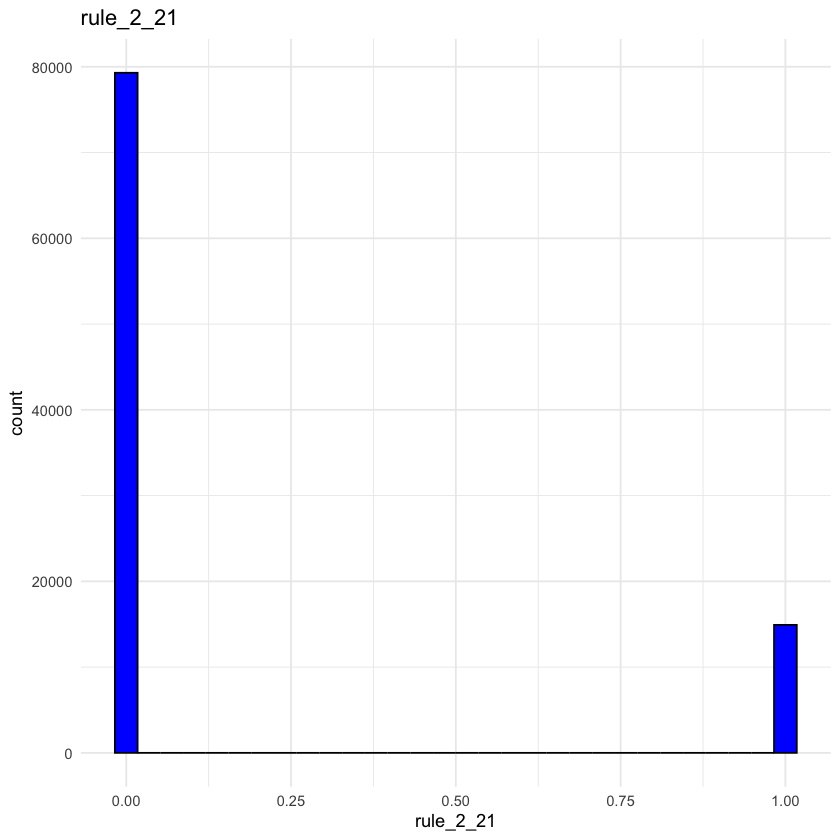

In [11]:
# 1. Plotting a histogram of the 'rule_2_21' column
ggplot(df, aes(x = rule_2_21)) + 
  geom_histogram(bins = 30, fill = "blue", color = "black") + 
  ggtitle("rule_2_21") +
  theme_minimal()

# 2. Calculating and printing the mode
# R does not have a built-in mode function, so we define one
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}
mode_rule_2_21 <- getmode(df$rule_2_21)
print(paste('mode:', mode_rule_2_21))

# 3. Printing summary statistics for 'rule_2_21'
print(summary(df$rule_2_21))

# 4. Filling missing values in 'rule_2_21' with its mode
df$rule_2_21[is.na(df$rule_2_21)] <- mode_rule_2_21


[1] "mode: 0"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   0.000   0.000   0.146   0.000   1.000    5777 


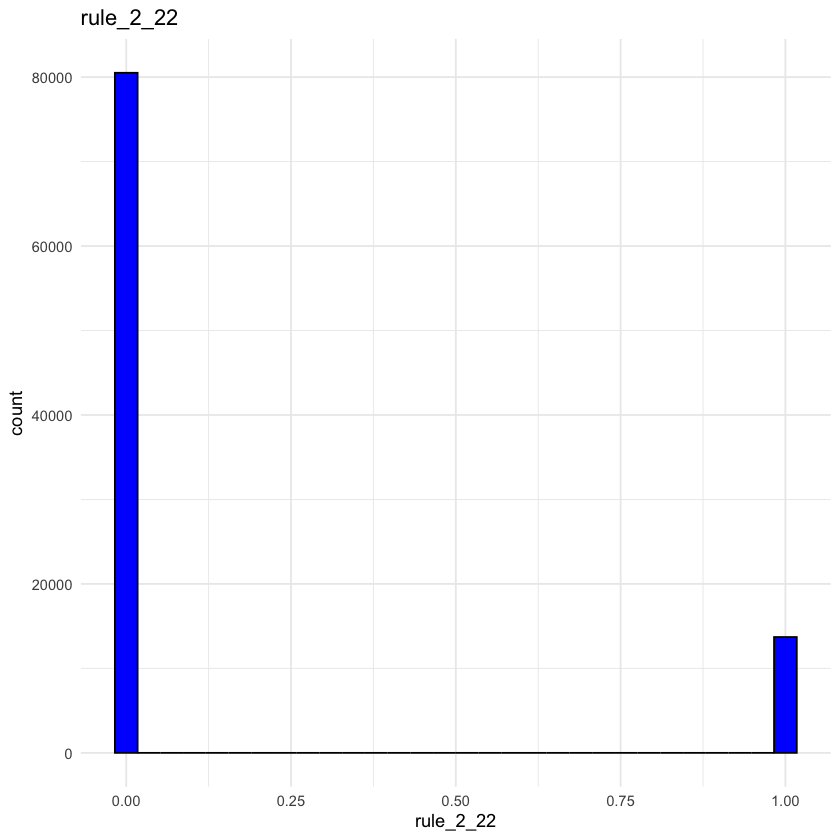

In [12]:
# 1. Plotting a histogram of the 'rule_2_22' column
ggplot(df, aes(x = rule_2_22)) + 
  geom_histogram(bins = 30, fill = "blue", color = "black") + 
  ggtitle("rule_2_22") +
  theme_minimal()

# 2. Calculating and printing the mode
# Using the previously defined getmode function
mode_rule_2_22 <- getmode(df$rule_2_22)
print(paste('mode:', mode_rule_2_22))

# 3. Printing summary statistics for 'rule_2_22'
print(summary(df$rule_2_22))

# 4. Filling missing values in 'rule_2_22' with its mode
df$rule_2_22[is.na(df$rule_2_22)] <- mode_rule_2_22

[1] "mode: 0"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   0.000   0.000   0.297   1.000   1.000    5777 


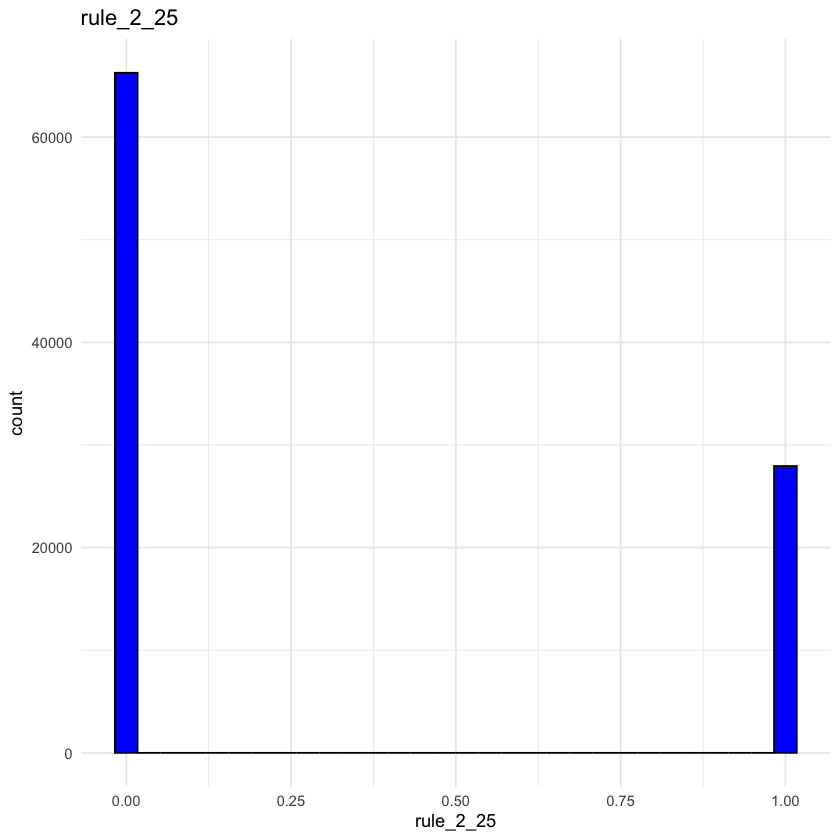

In [13]:
# 1. Plotting a histogram of the 'rule_2_25' column
ggplot(df, aes(x = rule_2_25)) + 
  geom_histogram(bins = 30, fill = "blue", color = "black") + 
  ggtitle("rule_2_25") +
  theme_minimal()

# 2. Calculating and printing the mode
mode_rule_2_25 <- getmode(df$rule_2_25)
print(paste('mode:', mode_rule_2_25))

# 3. Printing summary statistics for 'rule_2_25'
print(summary(df$rule_2_25))

# 4. Filling missing values in 'rule_2_25' with its mode
df$rule_2_25[is.na(df$rule_2_25)] <- mode_rule_2_25


[1] "mode: 1"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   0.000   1.000   0.542   1.000   1.000    5777 


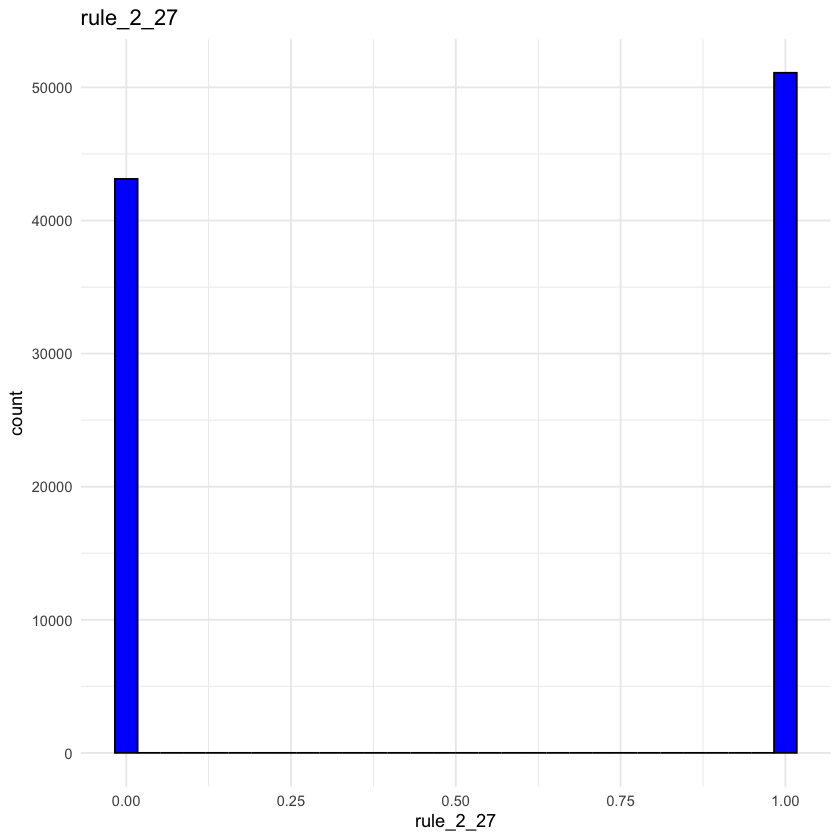

In [14]:
# 1. Plotting a histogram of the 'rule_2_27' column
ggplot(df, aes(x = rule_2_27)) + 
  geom_histogram(bins = 30, fill = "blue", color = "black") + 
  ggtitle("rule_2_27") +
  theme_minimal()

# If you prefer a base R approach for histogram:
# hist(df_keys_2$rule_2_27, main = "rule_2_27", xlab = "rule_2_27", col = "blue")

# 2. Calculating and printing the mode
mode_rule_2_27 <- getmode(df$rule_2_27)
print(paste('mode:', mode_rule_2_27))

# 3. Printing summary statistics for 'rule_2_27'
print(summary(df$rule_2_27))

# 4. Filling missing values in 'rule_2_27' with its mode
df$rule_2_27[is.na(df$rule_2_27)] <- mode_rule_2_27


[1] "mode: 0"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   0.000   0.000   0.068   0.000   1.000    5777 


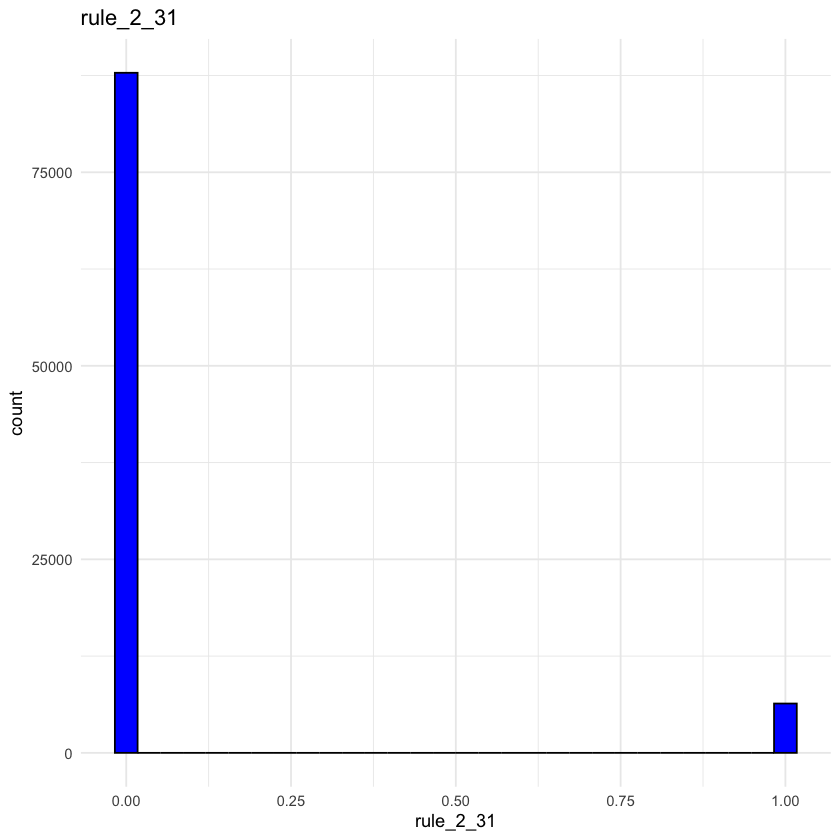

In [15]:
# Load necessary libraries
library(ggplot2)

# 1. Plotting a histogram of the 'rule_2_31' column
ggplot(df, aes(x = rule_2_31)) + 
  geom_histogram(bins = 30, fill = "blue", color = "black") + 
  ggtitle("rule_2_31") +
  theme_minimal()

# 2. Calculating and printing the mode
mode_rule_2_31 <- getmode(df$rule_2_31)
print(paste('mode:', mode_rule_2_31))

# 3. Printing summary statistics for 'rule_2_31'
print(summary(df$rule_2_31))

# 4. Filling missing values in 'rule_2_31' with its mode
df$rule_2_31[is.na(df$rule_2_31)] <- mode_rule_2_31


[1] "mode: 0"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00000 0.06371 0.00000 1.00000 


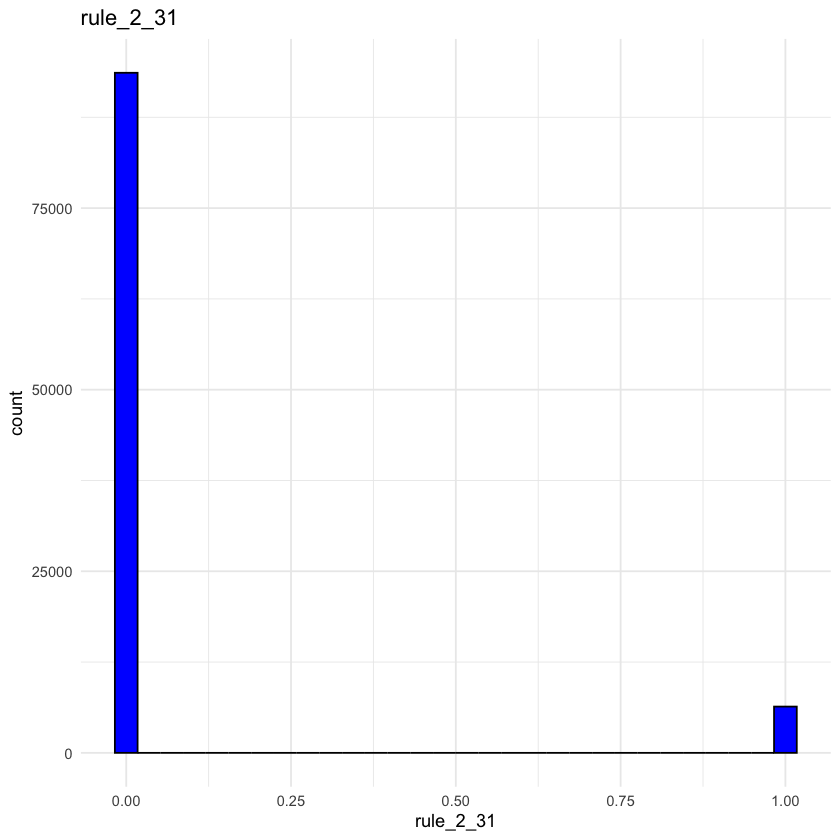

In [16]:
# 1. Plotting a histogram of the 'rule_2_31' column
ggplot(df, aes(x = rule_2_31)) + 
  geom_histogram(bins = 30, fill = "blue", color = "black") + 
  ggtitle("rule_2_31") +
  theme_minimal()

# 2. Calculating and printing the mode
mode_rule_2_31 <- getmode(df$rule_2_31)
print(paste('mode:', mode_rule_2_31))

# 3. Printing summary statistics for 'rule_2_31'
print(summary(df$rule_2_31))

# 4. Filling missing values in 'rule_2_31' with its mode
df$rule_2_31[is.na(df$rule_2_31)] <- mode_rule_2_31

[1] "mode: 0"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   0.000   0.000   0.098   0.000   1.000    5777 


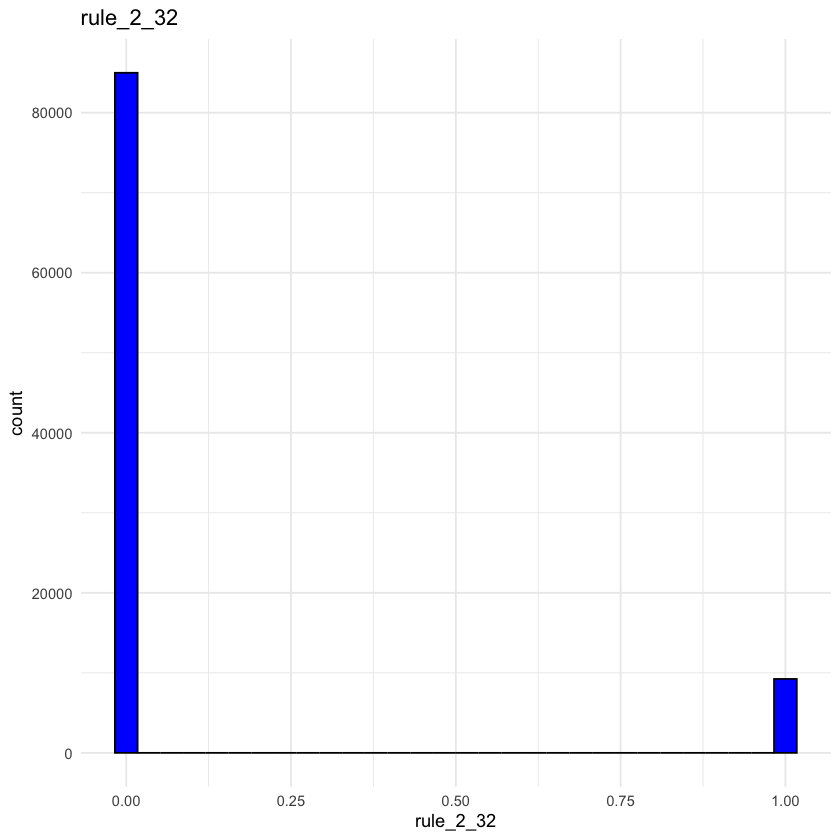

In [17]:
# 1. Plotting a histogram of the 'rule_2_32' column
ggplot(df, aes(x = rule_2_32)) + 
  geom_histogram(bins = 30, fill = "blue", color = "black") + 
  ggtitle("rule_2_32") +
  theme_minimal()

# 2. Calculating and printing the mode
mode_rule_2_32 <- getmode(df$rule_2_32)
print(paste('mode:', mode_rule_2_32))

# 3. Printing summary statistics for 'rule_2_32'
print(summary(df$rule_2_32))

# 4. Filling missing values in 'rule_2_32' with its mode
df$rule_2_32[is.na(df$rule_2_32)] <- mode_rule_2_32


[1] "mode: 0"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   0.000   0.000   0.125   0.000   1.000    5777 


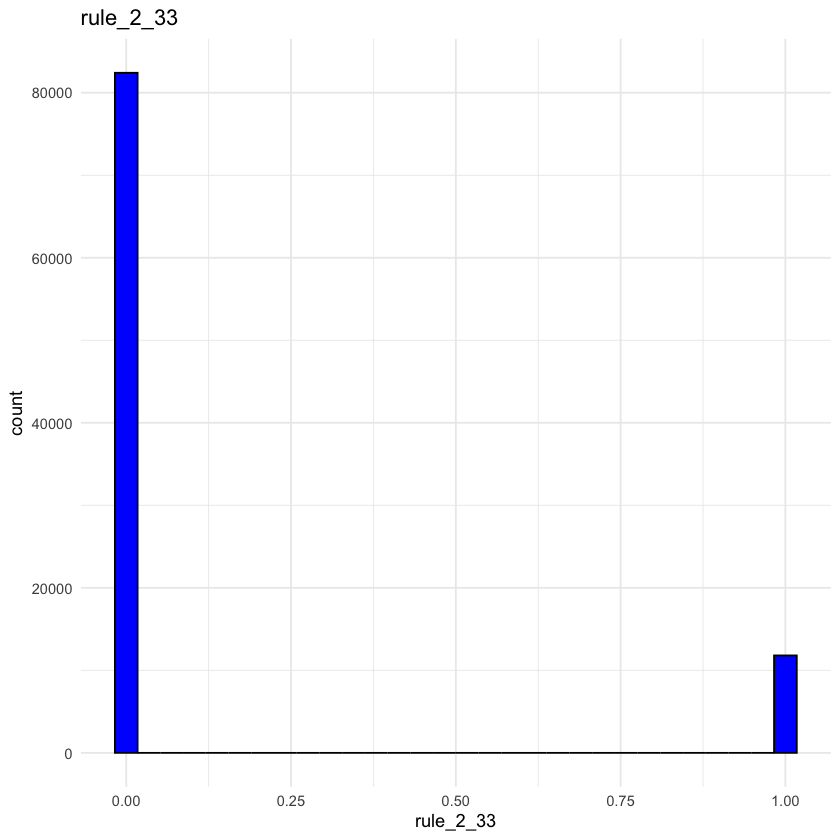

In [18]:
# Plotting a histogram of the 'rule_2_33' column in 'df'
ggplot(df, aes(x = rule_2_33)) + 
  geom_histogram(bins = 30, fill = "blue", color = "black") + 
  ggtitle("rule_2_33") +
  theme_minimal()

# Calculating the mode for 'rule_2_33'
mode_rule_2_33 <- df$rule_2_33[which.max(tabulate(match(df$rule_2_33, unique(df$rule_2_33))))]
print(paste('mode:', mode_rule_2_33))

# Printing summary statistics for 'rule_2_33'
print(summary(df$rule_2_33))

# Filling missing values in 'rule_2_33' with its mode
df$rule_2_33[is.na(df$rule_2_33)] <- mode_rule_2_33


[1] "mode: 0"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   0.000   0.000   0.226   0.000   1.000    5777 


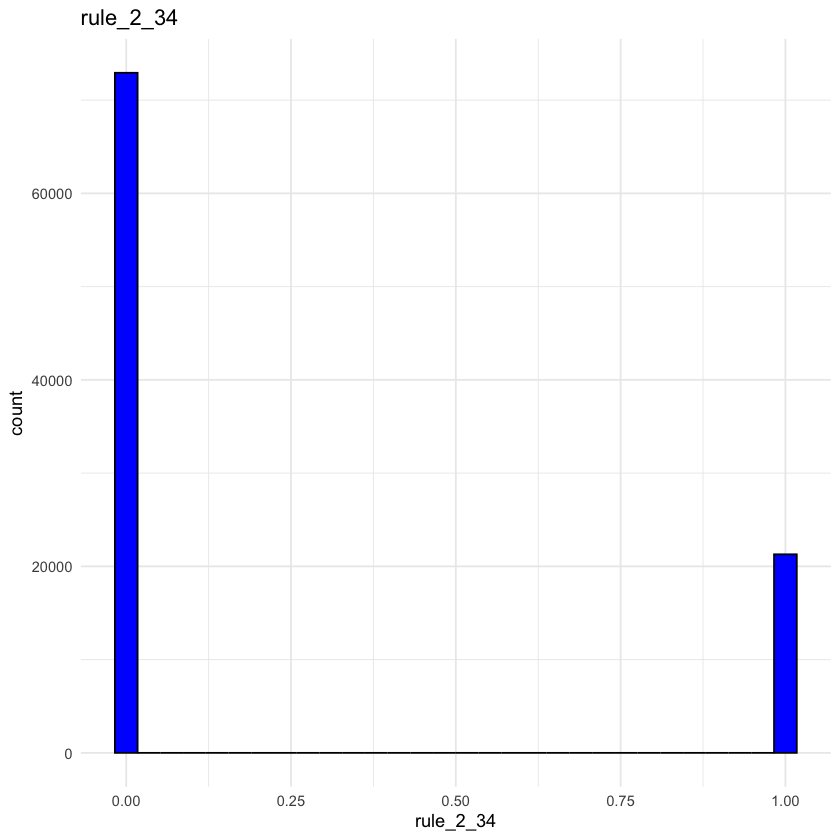

In [19]:
# Plotting a histogram of the 'rule_2_34' column in 'df'
ggplot(df, aes(x = rule_2_34)) + 
  geom_histogram(bins = 30, fill = "blue", color = "black") + 
  ggtitle("rule_2_34") +
  theme_minimal()

# Calculating the mode for 'rule_2_34'
mode_rule_2_34 <- df$rule_2_34[which.max(tabulate(match(df$rule_2_34, unique(df$rule_2_34))))]
print(paste('mode:', mode_rule_2_34))

# Printing summary statistics for 'rule_2_34'
print(summary(df$rule_2_34))

# Filling missing values in 'rule_2_34' with its mode
df$rule_2_34[is.na(df$rule_2_34)] <- mode_rule_2_34


[1] "mode: 0"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   0.000   0.000   0.408   1.000   1.000    5777 


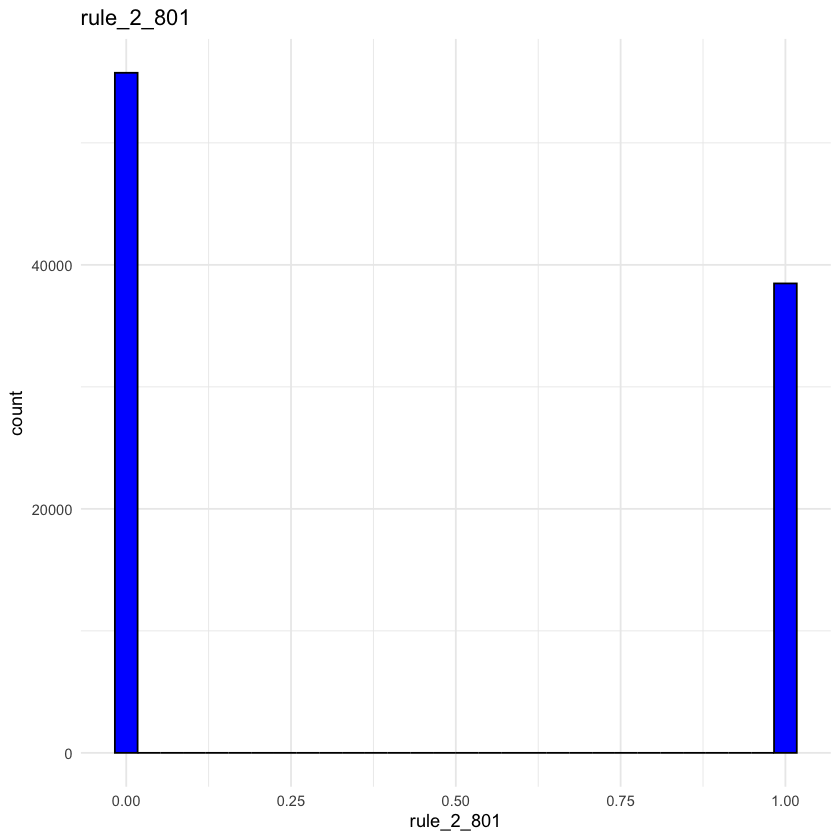

In [20]:
# Plotting a histogram of the 'rule_2_801' column in 'df'
ggplot(df, aes(x = rule_2_801)) + 
  geom_histogram(bins = 30, fill = "blue", color = "black") + 
  ggtitle("rule_2_801") +
  theme_minimal()

# Calculating the mode for 'rule_2_801'
mode_rule_2_801 <- df$rule_2_801[which.max(tabulate(match(df$rule_2_801, unique(df$rule_2_801))))]
print(paste('mode:', mode_rule_2_801))

# Printing summary statistics for 'rule_2_801'
print(summary(df$rule_2_801))

# Filling missing values in 'rule_2_801' with its mode
df$rule_2_801[is.na(df$rule_2_801)] <- mode_rule_2_801


[1] "mode: 0"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   0.000   0.000   0.235   0.000   1.000    5777 


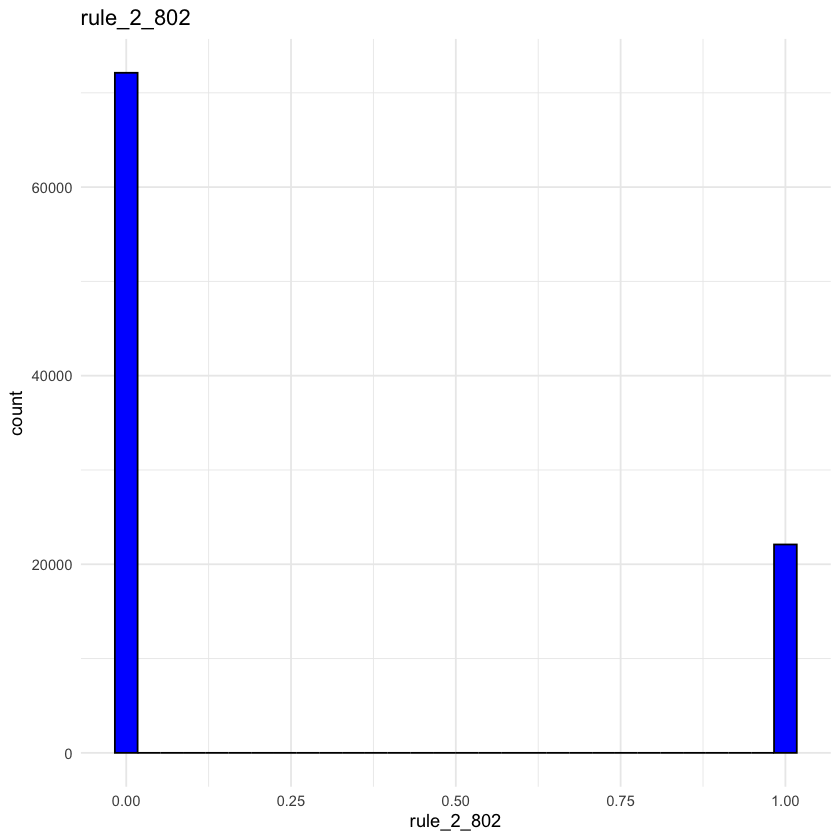

In [21]:
# Plotting a histogram of the 'rule_2_802' column in 'df'
ggplot(df, aes(x = rule_2_802)) + 
  geom_histogram(bins = 30, fill = "blue", color = "black") + 
  ggtitle("rule_2_802") +
  theme_minimal()

# Calculating the mode for 'rule_2_802'
mode_rule_2_802 <- df$rule_2_802[which.max(tabulate(match(df$rule_2_802, unique(df$rule_2_802))))]
print(paste('mode:', mode_rule_2_802))

# Printing summary statistics for 'rule_2_802'
print(summary(df$rule_2_802))

# Filling missing values in 'rule_2_802' with its mode
df$rule_2_802[is.na(df$rule_2_802)] <- mode_rule_2_802


[1] "mode: 0"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   0.000   1.000   0.629   1.000   1.000    5777 


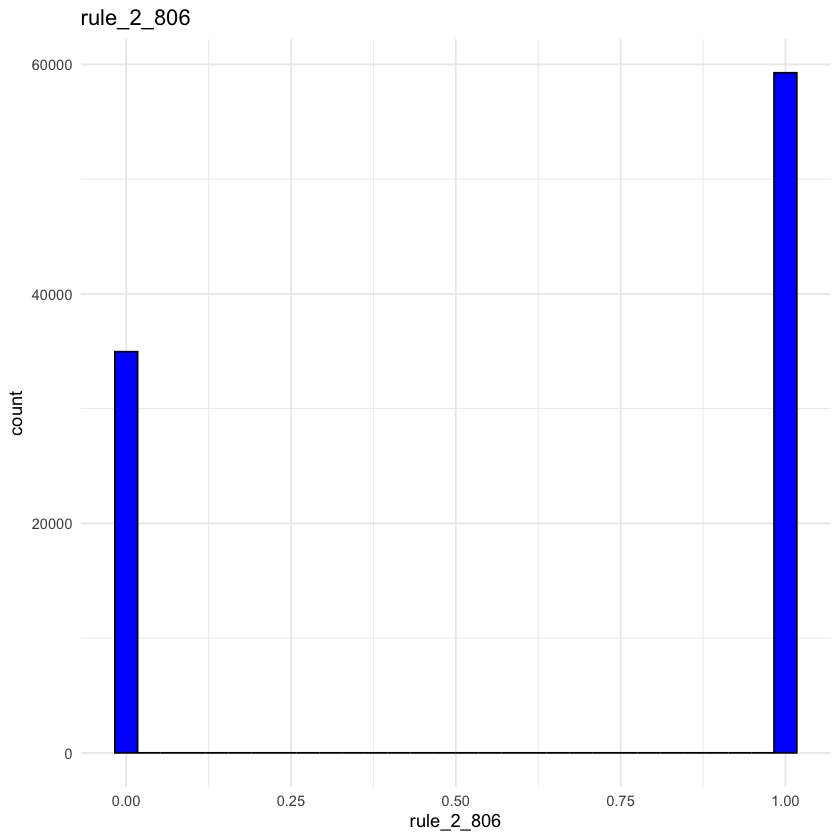

In [22]:

# Plotting a histogram of the 'rule_2_806' column in 'df'
ggplot(df, aes(x = rule_2_806)) + 
  geom_histogram(bins = 30, fill = "blue", color = "black") + 
  ggtitle("rule_2_806") +
  theme_minimal()

# Calculating the mode for 'rule_2_806'
mode_rule_2_806 <- df$rule_2_806[which.max(tabulate(match(df$rule_2_806, unique(df$rule_2_806))))]
print(paste('mode:', mode_rule_2_806))

# Printing summary statistics for 'rule_2_806'
print(summary(df$rule_2_806))

# Filling missing values in 'rule_2_806' with its mode
df$rule_2_806[is.na(df$rule_2_806)] <- mode_rule_2_806



Filling gaps in non-binary characteristics

This R code does the following:

Checks for NA values in the rules_count column. \
For rows with NA in rules_count, it calculates the sum of the specified columns.\
It uses rowSums() to calculate the sum across the specified columns for each row. The na.rm = TRUE argument ensures that NA values are ignored in the summation. \
The resulting sums are then used to fill in the NA values in the rules_count column.

In [23]:
# Filling NA values in 'rules_count' with the sum of other specified columns
df$rules_count[is.na(df$rules_count)] <- rowSums(df[is.na(df$rules_count), c('rule_2_21', 'rule_2_22', 'rule_2_25',
                                                                              'rule_2_27', 'rule_2_31', 'rule_2_32', 'rule_2_33', 'rule_2_34')], na.rm = TRUE)


[1] "mode: NA"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.0   167.0   234.0   256.5   321.0   936.0   13472 


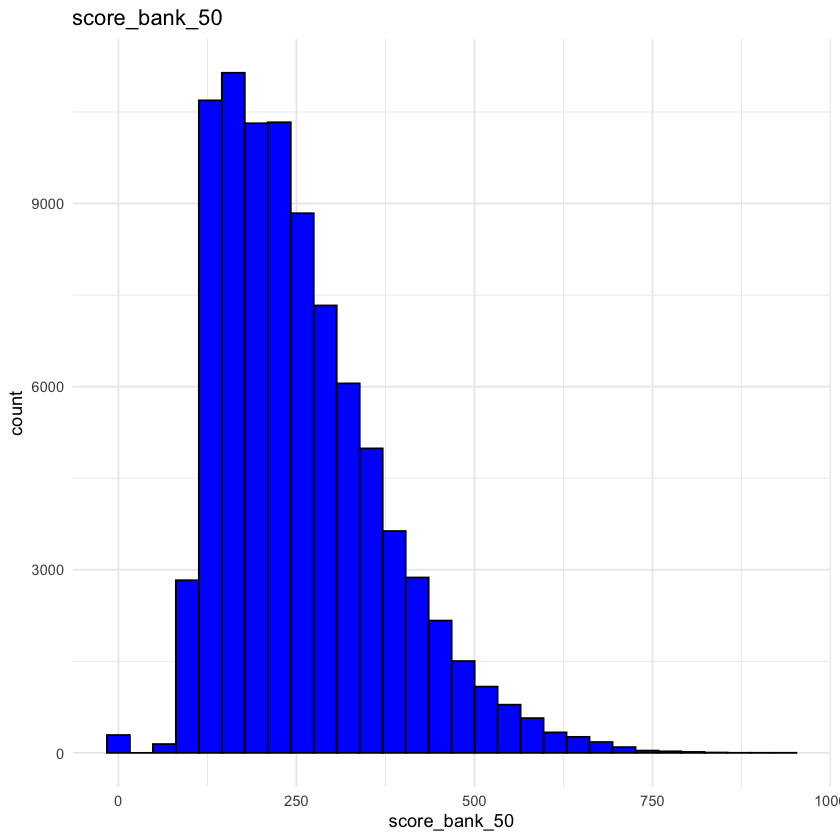

In [24]:
# Plotting a histogram of the 'score_bank_50' column in 'df'
ggplot(df, aes(x = score_bank_50)) + 
  geom_histogram(bins = 30, fill = "blue", color = "black") + 
  ggtitle("score_bank_50") +
  theme_minimal()

# Calculating the mode for 'score_bank_50'
mode_score_bank_50 <- df$score_bank_50[which.max(tabulate(match(df$score_bank_50, unique(df$score_bank_50))))]
print(paste('mode:', mode_score_bank_50))

# Printing summary statistics for 'score_bank_50'
print(summary(df$score_bank_50))

# Filling missing values in 'score_bank_50' with its mean
df$score_bank_50[is.na(df$score_bank_50)] <- mean(df$score_bank_50, na.rm = TRUE)

plot a histogram for the score_bank_50 column, calculate and print the mode, provide a summary of the column, and fill in missing values with the mean,

[1] "mode: NA"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 -1.000   0.116   0.124   0.052   0.131   0.347   13472 


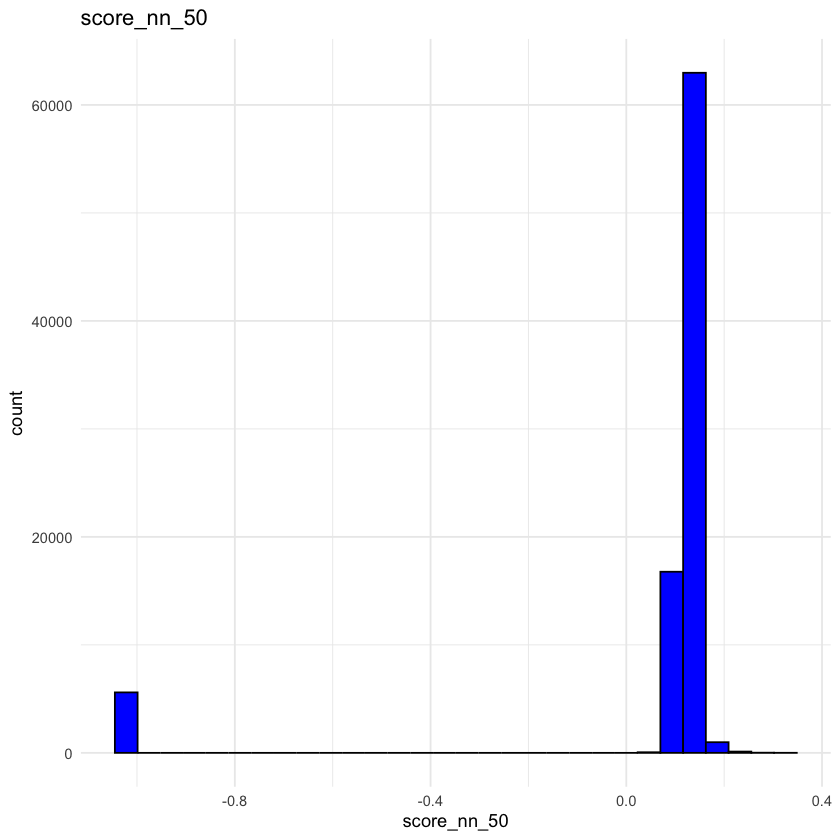

In [25]:
# Plotting a histogram of the 'score_nn_50' column in 'df'
ggplot(df, aes(x = score_nn_50)) + 
  geom_histogram(bins = 30, fill = "blue", color = "black") + 
  ggtitle("score_nn_50") +
  theme_minimal()

# Calculating the mode for 'score_nn_50'
mode_score_nn_50 <- df$score_nn_50[which.max(tabulate(match(df$score_nn_50, unique(df$score_nn_50))))]
print(paste('mode:', mode_score_nn_50))

# Printing summary statistics for 'score_nn_50'
print(summary(df$score_nn_50))

# Filling missing values in 'score_nn_50' with its mode
df$score_nn_50[is.na(df$score_nn_50)] <- mode_score_nn_50


[1] "mode: NA"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 -1.000   0.116   0.124   0.052   0.131   0.347   13472 


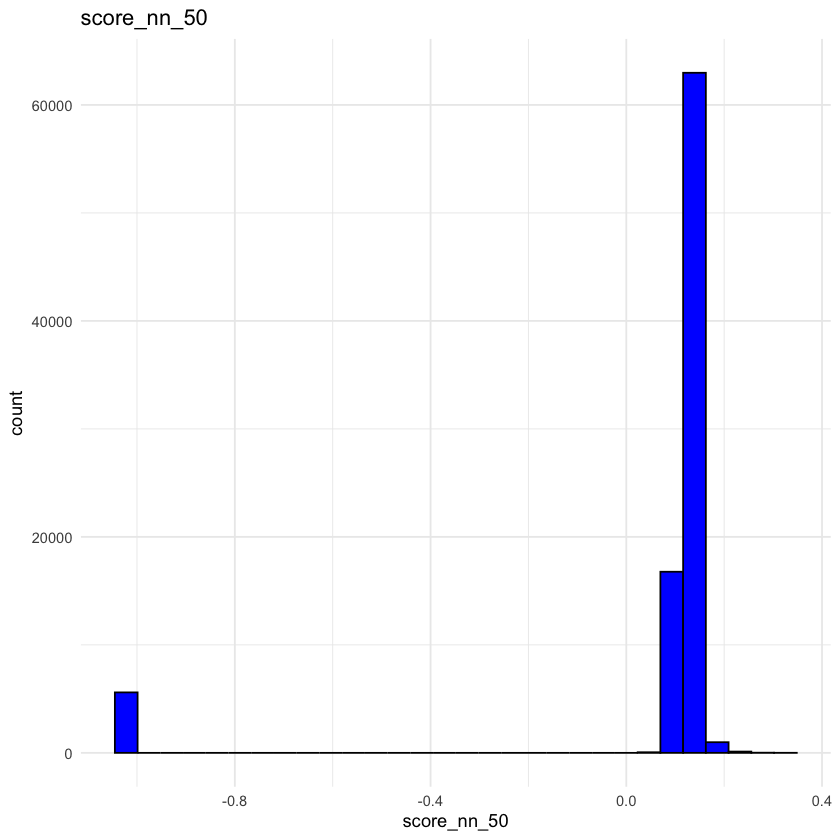

In [26]:
# Plotting a histogram of the 'score_nn_50' column in 'df'
ggplot(df, aes(x = score_nn_50)) + 
  geom_histogram(bins = 30, fill = "blue", color = "black") + 
  ggtitle("score_nn_50") +
  theme_minimal()

# Calculating the mode for 'score_nn_50'
mode_score_nn_50 <- df$score_nn_50[which.max(tabulate(match(df$score_nn_50, unique(df$score_nn_50))))]
print(paste('mode:', mode_score_nn_50))

# Printing summary statistics for 'score_nn_50'
print(summary(df$score_nn_50))

# Filling missing values in 'score_nn_50' with its mode
df$score_nn_50[is.na(df$score_nn_50)] <- mode_score_nn_50


[1] "mode: NA"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   52.0   152.0   201.0   220.4   271.0   853.0   13472 


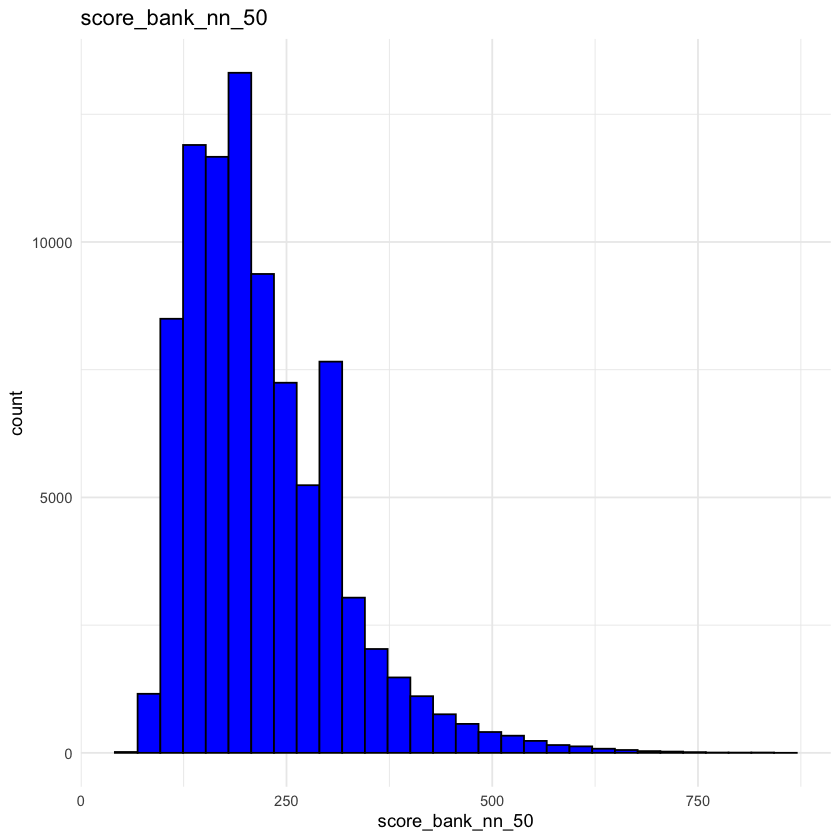

In [27]:
# Plotting a histogram of the 'score_bank_nn_50' column in 'df'
ggplot(df, aes(x = score_bank_nn_50)) + 
  geom_histogram(bins = 30, fill = "blue", color = "black") + 
  ggtitle("score_bank_nn_50") +
  theme_minimal()

# Calculating the mode for 'score_bank_nn_50' (for consistency, though mean is used for imputation)
mode_score_bank_nn_50 <- df$score_bank_nn_50[which.max(tabulate(match(df$score_bank_nn_50, unique(df$score_bank_nn_50))))]
print(paste('mode:', mode_score_bank_nn_50))

# Printing summary statistics for 'score_bank_nn_50'
print(summary(df$score_bank_nn_50))

# Filling missing values in 'score_bank_nn_50' with its mean
df$score_bank_nn_50[is.na(df$score_bank_nn_50)] <- mean(df$score_bank_nn_50, na.rm = TRUE)


In [28]:
# Print the structure of the dataframe
str(df)

# Get a summary of the number of non-NA values and basic statistics for each column
summary(df)

# Print the dimensions of the dataframe
cat("Dimensions of dataframe: ", dim(df), "\n")

# Check for missing values in each column
sapply(df, function(x) sum(is.na(x)))

# Print the memory usage of the dataframe
print(object.size(df), units = "auto")


'data.frame':	100000 obs. of  26 variables:
 $ id              : int  238687671 248689049 276054054 313767939 342351235 241793622 349443099 310803433 489653217 315457381 ...
 $ date            : chr  "20.06.2019" "02.08.2019" "22.11.2019" "24.02.2020" ...
 $ target          : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ req_amt         : num  689385 450000 500000 730000 1490000 ...
 $ age             : int  40 57 32 31 68 38 67 40 40 38 ...
 $ rule_2_21       : num  0 0 1 0 0 0 0 0 0 0 ...
 $ rule_2_22       : num  0 0 1 0 0 0 0 0 0 0 ...
 $ rule_2_25       : num  1 0 1 0 0 0 0 1 0 0 ...
 $ rule_2_27       : num  1 0 1 1 0 1 0 1 0 1 ...
 $ rule_2_31       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ rule_2_32       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ rule_2_33       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ rule_2_34       : num  0 0 1 0 0 0 0 1 0 0 ...
 $ rule_2_801      : num  1 0 0 1 1 1 0 1 0 0 ...
 $ rule_2_802      : num  0 0 1 1 0 1 0 1 0 0 ...
 $ rule_2_806      : num  0 0 1 1 1 1 1 1 1 1

       id                date           target       req_amt       
 Min.   :137175209   Length:100000      0:99871   Min.   :  50000  
 1st Qu.:220747368   Class :character   1:  129   1st Qu.: 400000  
 Median :263040542   Mode  :character             Median : 614900  
 Mean   :280116429                                Mean   : 681123  
 3rd Qu.:337582833                                3rd Qu.: 900000  
 Max.   :517283235                                Max.   :3000000  
                                                                   
      age          rule_2_21        rule_2_22        rule_2_25     
 Min.   : 0.00   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:34.00   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :41.00   Median :0.0000   Median :0.0000   Median :0.0000  
 Mean   :42.08   Mean   :0.1492   Mean   :0.1371   Mean   :0.2795  
 3rd Qu.:50.00   3rd Qu.:0.0000   3rd Qu.:0.0000   3rd Qu.:1.0000  
 Max.   :89.00   Max.   :1.0000   Max.   :1.0000

Dimensions of dataframe:  100000 26 


id             date           target          req_amt 
               0                0                0                0 
             age        rule_2_21        rule_2_22        rule_2_25 
               0                0                0                0 
       rule_2_27        rule_2_31        rule_2_32        rule_2_33 
               0                0                0                0 
       rule_2_34       rule_2_801       rule_2_802       rule_2_806 
               0                0                0                0 
    rule_combi_1     rule_combi_2      rules_count    score_bank_16 
               0                0                0            13472 
   score_bank_50      score_nn_16      score_nn_50 score_bank_nn_16 
               0            13472            13472            13472 
score_bank_nn_50      count_nulls 
               0                0

18 Mb


# Working with hypotheses
Based on the initial analysis of the data, it became clear that the data represents separate transactions. The main hypotheses regarding transactional fraud are:

- The frequency of fraudulent transactions from the card.
- The discrepancy between the card data and the passport data of its holder.

However, since the data is anonymized, decryption attempts are necessary.

Good hypotheses, based on statistics on the data, include:

- Repeated transactions with the same "yield" (repeated transactions within a short period of time).
- Identifying salary accounts based on the date of age and amount, with the introduction of an additional indicator for weekends (as wages are typically calculated on weekdays).
- One of the rules may involve detecting the first transfer from someone else’s card.


In [29]:
# Split the 'date' column into separate columns for day, month, and year
date_components <- strsplit(as.character(df$date), "\\.")
df$day <- sapply(date_components, function(x) as.integer(x[1]))
df$month <- sapply(date_components, function(x) as.integer(x[2]))
df$year <- sapply(date_components, function(x) as.integer(x[3]))

# Check the first few rows to verify
head(df)


,id,date,target,req_amt,age,rule_2_21,rule_2_22,rule_2_25,rule_2_27,rule_2_31,⋯,score_bank_16,score_bank_50,score_nn_16,score_nn_50,score_bank_nn_16,score_bank_nn_50,count_nulls,day,month,year
,<int>,<chr>,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,238687671,20.06.2019,0,689385,40,0,0,1,1,0,⋯,148,161.0000,0.1511,0.1243,224,202.0000,0,20,6,2019
2,248689049,02.08.2019,0,450000,57,0,0,0,0,0,⋯,128,128.0000,-1.0000,-1.0000,313,313.0000,0,2,8,2019
3,276054054,22.11.2019,0,500000,32,1,1,1,1,0,⋯,289,294.0000,0.1255,0.1278,264,227.0000,0,22,11,2019
4,313767939,24.02.2020,0,730000,31,0,0,0,1,0,⋯,NA,256.5281,NA,NA,NA,220.4442,0,24,2,2020
5,342351235,10.06.2020,0,1490000,68,0,0,0,0,0,⋯,NA,256.5281,NA,NA,NA,220.4442,0,10,6,2020
6,241793622,03.07.2019,0,564136,38,0,0,0,1,0,⋯,210,214.0000,0.1206,0.1226,157,123.0000,0,3,7,2019


In [30]:
# Subset the dataframe for rows where 'target' equals 1 and get a summary of the 'age' column
fraudster_age_summary <- summary(df[df$target == 1, 'age'])

# Print the summary
print(fraudster_age_summary)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  24.00   32.00   42.00   41.37   50.00   65.00 


In [31]:
library(dplyr)

df <- df %>%
  mutate(age_group = case_when(
    age >= 24 & age <= 24 ~ 1,
    age > 24 & age <= 42 ~ 2,
    age > 42 & age <= 65 ~ 3,
    age > 65 ~ 4,
    TRUE ~ 0  # Default case if none of the above conditions are met
  ))


In [32]:
# Subset the dataframe for rows where 'target' equals 1 and get a summary of the 'req_amt' column
fraudster_req_amt_summary <- summary(df[df$target == 1, 'req_amt'])

# Print the summary
print(fraudster_req_amt_summary)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 370000  810000 1050000 1054612 1320000 1804800 


In [33]:
# Calculate the minimum 'req_amt' for rows where 'target' equals 1
min_fraud_amt_value <- min(df[df$target == 1, "req_amt"], na.rm = TRUE)

# Initialize the 'min_fraud_amt' column to 0
df$min_fraud_amt <- 0

# Update 'min_fraud_amt' to 1 where 'req_amt' is greater than the minimum fraud 'req_amt'
df$min_fraud_amt[df$req_amt > min_fraud_amt_value] <- 1


In [66]:
library(dplyr)
library(lubridate)

df <- df %>%
  mutate(date = dmy(date), # Adjust the function dmy(), mdy(), ymd() based on your date format
         weekend = if_else(wday(date) %in% c(1, 7), 1, 0)) # `wday()` defaults to Sunday=1, Saturday=7


In [35]:
# Adjust the date parsing function (ymd, dmy, mdy) based on your actual date format
df$date <- ymd(df$date)

# Getting the number of the day with wday, setting week_start to define which day is considered the start of the week
# By default, wday returns 1 = Sunday, 2 = Monday, ..., 7 = Saturday
df$number_of_day <- wday(df$date)

In [36]:
# Assuming 'df' is your dataframe
df <- df %>%
  mutate(salary_card = 0) # Initialize 'salary_card' with 0

# Grouping and counting
salary <- df %>%
  filter(weekend == 0) %>%
  group_by(age, req_amt, day) %>%
  summarise(id_count = n(), .groups = 'drop') %>%
  filter(id_count >= 4) # Keeping groups with count >= 4

# Merging back to the original dataframe
df <- df %>%
  left_join(salary, by = c("age", "req_amt", "day")) %>%
  mutate(salary_card = ifelse(!is.na(id_count), 1, salary_card)) %>%
  select(-id_count) # Removing the extra 'id_count' column after merge


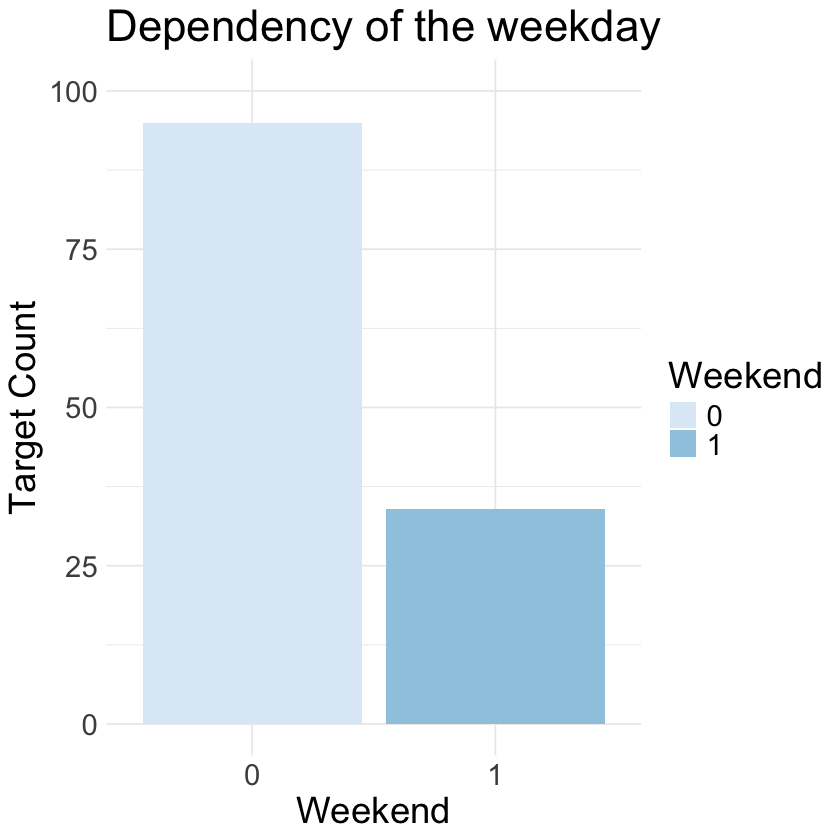

In [37]:
# Filter for target == 1 and then count occurrences by 'weekend'
l <- df %>% 
  filter(target == 1) %>%
  group_by(weekend) %>%
  summarise(target_count = n())

# Create the bar plot
ggplot(l, aes(x = as.factor(weekend), y = target_count, fill = as.factor(weekend))) + 
  geom_bar(stat = "identity", position = position_dodge()) +
  scale_fill_brewer(palette = "Blues", name = "Weekend") +
  labs(x = "Weekend", y = "Target Count", title = "Dependency of the weekday") +
  theme_minimal() +
  theme(text = element_text(size = 22)) +
  ylim(0, 100)


The dependence on the type of card is visible; on cards with periodic payments, fraud occurs much less

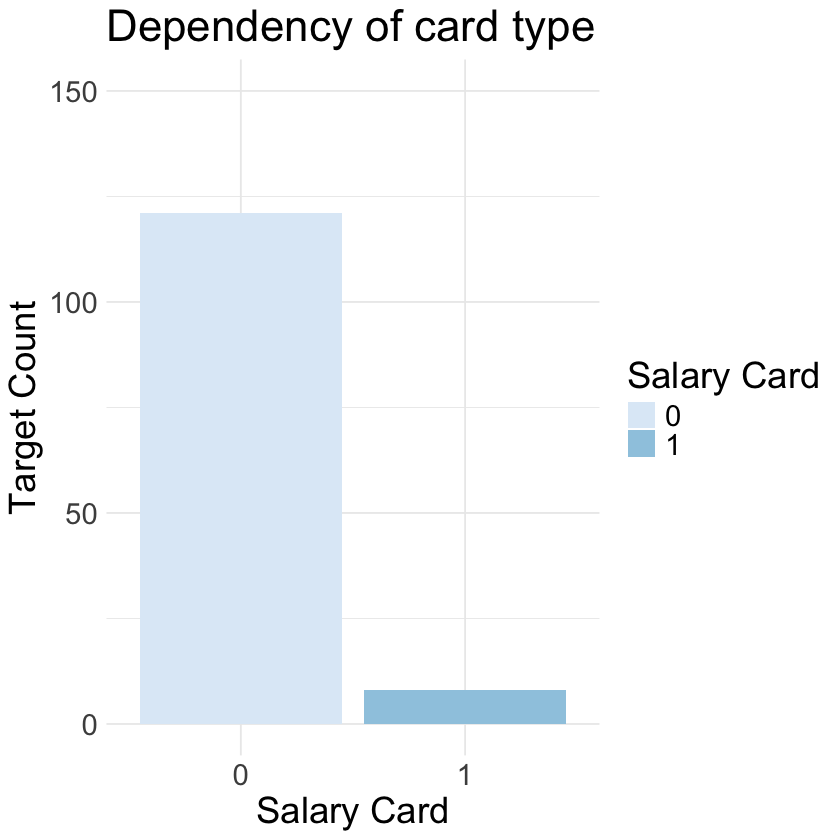

In [38]:
# Prepare the data
l_salary <- df %>%
  filter(target == 1) %>%
  count(salary_card, target) %>%
  rename(target_count = n)

# Create the plot
ggplot(l_salary, aes(x = as.factor(salary_card), y = target_count, fill = as.factor(salary_card))) + 
  geom_bar(stat = "identity") +
  scale_fill_brewer(palette = "Blues", name = "Salary Card") +
  labs(x = "Salary Card", y = "Target Count", title = "Dependency of card type") +
  theme_minimal() +
  theme(text = element_text(size = 22)) +
  ylim(0, 150)


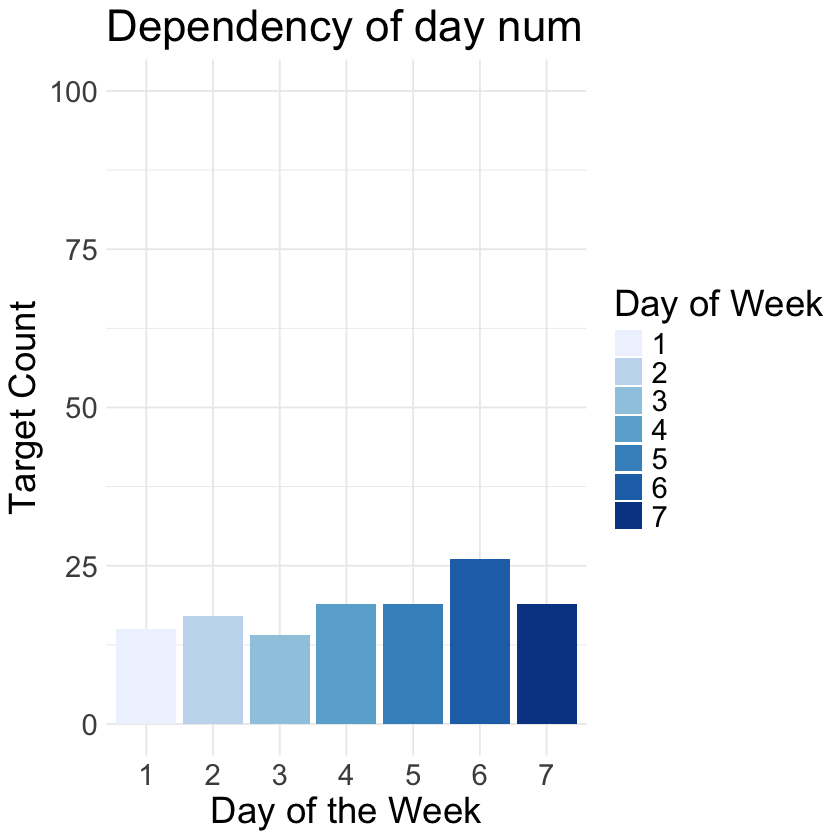

In [39]:
# Prepare the data
l_day <- df %>%
  filter(target == 1) %>%
  count(number_of_day, target) %>%
  rename(target_count = n)

# Create the plot
ggplot(l_day, aes(x = as.factor(number_of_day), y = target_count, fill = as.factor(number_of_day))) + 
  geom_bar(stat = "identity") +
  scale_fill_brewer(palette = "Blues", name = "Day of Week") +
  labs(x = "Day of the Week", y = "Target Count", title = "Dependency of day num") +
  theme_minimal() +
  theme(text = element_text(size = 22)) +
  ylim(0, 100)


# Fiting and prediction

Step 1: Data Preparation and Logistic Regression Model Fitting
First, let's prepare the data and fit a logistic regression model:

In [49]:
# Assuming 'df' and 'df_keys_2' are your dataframes
df_prep <- df[, !(names(df) %in% c('target', 'date', 'id', 'count_nulls'))] # Exclude 'target', 'date', 'id'
target <- df$target

# Standard scaling
df_scaled <- scale(df_prep)

# Fit Logistic Regression Model
fit_lr <- glm(target ~ ., data = as.data.frame(df_scaled), family = binomial(link = 'logit'))

# Extract and sort coefficients
coef_lr <- summary(fit_lr)$coefficients
sorted_coef_lr <- coef_lr[order(-abs(coef_lr[, "Estimate"])), ]

In [50]:
sorted_coef_lr

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-12.525889555,66.47876302,-0.18841941,8.505479e-01
score_nn_16,9.839042114,3.14039583,3.13305794,1.729953e-03
min_fraud_amt,5.906455202,127.49183015,0.04632811,9.630487e-01
score_nn_50,-3.629514817,3.82343707,-0.94928065,3.424779e-01
score_bank_nn_50,1.334315672,0.28223257,4.72771682,2.270586e-06
score_bank_nn_16,-1.003122069,0.33910280,-2.95816507,3.094764e-03
year,-0.951570893,0.14146414,-6.72658715,1.736886e-11
score_bank_16,0.905169232,0.51838546,1.74613160,8.078809e-02
req_amt,0.813045037,0.09366984,8.67990244,3.961085e-18
rule_2_33,0.760446121,0.34253205,2.22007293,2.641382e-02


Step 2: Scoping Out Multiple Models and Comparing Them Based on F1 Score

In [59]:
library(caret)

# Data partition
set.seed(123) # For reproducibility
index <- createDataPartition(target, p = .8, list = FALSE)  # This returns a matrix, not a list
train_data <- df_scaled[index, , drop = FALSE] 
train_target <- target[index]
test_data <- df_scaled[-index, , drop = FALSE] 
test_target <- target[-index]

# Impute NA values in train_data and test_data with the median of each column
train_data <- apply(train_data, 2, function(x) ifelse(is.na(x), median(x, na.rm = TRUE), x))
test_data <- apply(test_data, 2, function(x) ifelse(is.na(x), median(x, na.rm = TRUE), x))

# Convert back to data frame if necessary
train_data <- as.data.frame(train_data)
test_data <- as.data.frame(test_data)

# Train a logistic regression model
ctrl <- trainControl(method = "none")
fit_lr_caret <- train(x = train_data, y = train_target, method = "glm", family = "binomial", trControl = ctrl)

# Train a random forest model as an example
fit_rf <- train(x = train_data, y = train_target, method = "rf", trControl = ctrl)

# Predict and calculate F1 score
predictions_lr <- factor(predictions_lr, levels = levels(test_target))
predictions_rf <- factor(predictions_rf, levels = levels(test_target))

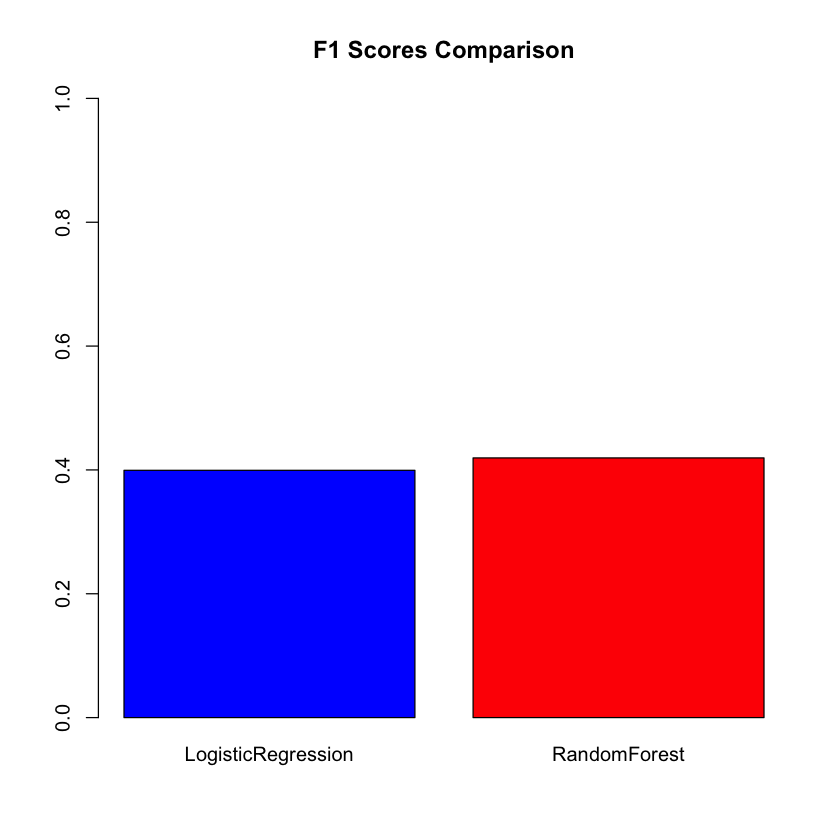

In [63]:
calculateF1Score <- function(predictions, actual) {
  cm <- table(actual, predictions)
  precision <- diag(cm) / rowSums(cm)
  recall <- diag(cm) / colSums(cm)
  f1 <- 2 * precision * recall / (precision + recall)
  return(mean(f1, na.rm = TRUE)) # Return the average F1 score if multiple classes
}

f1_lr <- calculateF1Score(predictions_lr, test_target)
f1_rf <- calculateF1Score(predictions_rf, test_target)

# Comparing F1 scores
f1_scores <- c(LogisticRegression = f1_lr, RandomForest = f1_rf)
barplot(f1_scores, main = "F1 Scores Comparison", col = c("blue", "red"), names.arg = names(f1_scores), ylim = c(0, 1))

In [64]:
f1_scores

LogisticRegression       RandomForest 
         0.3993746          0.4193785